# Importación de Librerías y Carga de Datos

En esta primera sección, importamos las librerías necesarias para trabajar con los datos y los algoritmos de recomendación. También cargamos el dataset `steam-200k.csv` que contiene información sobre usuarios, juegos y horas jugadas.


In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from surprise import Dataset, Reader
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth, fpmax
from surprise import SVD, KNNBasic
from surprise import accuracy
from sklearn.linear_model import Perceptron
from surprise.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [164]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing
from ucimlrepo import fetch_ucirepo

In [165]:
heart_failure_clinical_records = fetch_ucirepo(id=519)

In [166]:
scaler = MinMaxScaler()

# Ajusta el escalador a tus datos y transforma los datos
data_feat_scaled = scaler.fit_transform(heart_failure_clinical_records.data.features)
data_targ_scaled = scaler.fit_transform(heart_failure_clinical_records.data.targets)

# Convierte los datos escalados de nuevo a un DataFrame
df_feat_scaled = pd.DataFrame(data_feat_scaled, columns=heart_failure_clinical_records.data.features.columns)
df_targ_scaled = pd.DataFrame(data_targ_scaled, columns=heart_failure_clinical_records.data.targets.columns)
# Ahora scaled_df contiene tus datos escalados
df_feat_scaled
df_targ_scaled

,death_event
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
294,0.0
295,0.0
296,0.0
297,0.0


In [167]:
X = data_feat_scaled
y = data_targ_scaled

# metadata
print(heart_failure_clinical_records.metadata)

# variable information
print(heart_failure_clinical_records.variables)

{'uci_id': 519, 'name': 'Heart Failure Clinical Records', 'repository_url': 'https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/519/data.csv', 'abstract': 'This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 299, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['death_event'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5Z89R', 'creators': [], 'intro_paper': {'ID': 286, 'type': 'NATIVE', 'title': 'Machine learning can predict survival of patients with heart failure f

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [169]:
modelo = MLPClassifier(
                hidden_layer_sizes=(5),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.84      0.76        44
         1.0       0.67      0.45      0.54        31

    accuracy                           0.68        75
   macro avg       0.68      0.65      0.65        75
weighted avg       0.68      0.68      0.67        75



C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [170]:
param_grid = {
    'hidden_layer_sizes': [1, 2, (1,1), (1,2), (2,2), 3, 4, 5],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],  # 'adam' es generalmente una buena opción
    'alpha': [0.0001, 0.001, 0.01],  # Regularización L2
    'learning_rate_init': [0.001, 0.01, 0.1],  # Tasa de aprendizaje
    'max_iter': [100]  # Mayor iteraciones para asegurar la convergencia
}


In [ ]:


#param_grid = {'hidden_layer_sizes':[1, 5, 10, 15, 25, 50, (5,5), (10, 10, 10), (5, 5, 5, 5)]}
# param_grid = {'hidden_layer_sizes':[1, 2, (1,1), (1,2), (2,2), 3, 4, 5]}
grid = GridSearchCV(
        estimator = MLPClassifier(
                        learning_rate_init=0.01,
                        solver = 'lbfgs',
                        alpha  = 0,
                        max_iter = 1000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X_train, y_train)

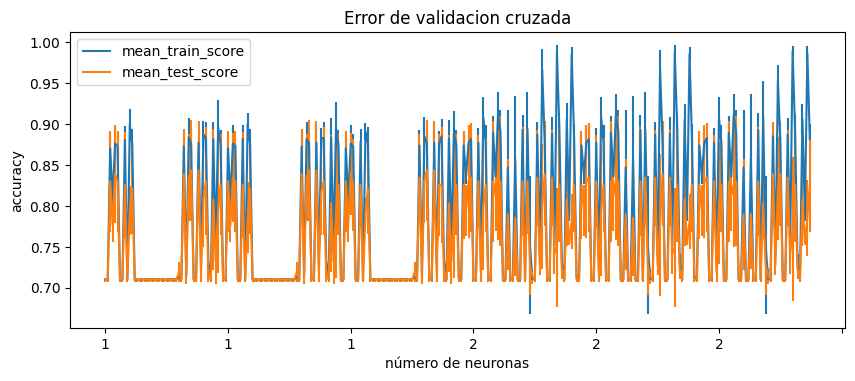

In [172]:
fig, ax = plt.subplots(figsize=(10, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('número de neuronas')
ax.set_title('Error de validacion cruzada');

In [173]:
grid.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': 3,
 'learning_rate_init': 0.1,
 'max_iter': 200,
 'solver': 'sgd'}

In [174]:
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate_init,param_max_iter,param_solver,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.078379,0.007033,0.000000,0.000000,relu,0.0001,1,0.001,200,adam,...,0.709798,0.002626,157,0.709497,0.709497,0.709497,0.709497,0.711111,0.709820,0.000646
1,0.071894,0.002909,0.000366,0.000448,relu,0.0001,1,0.001,200,sgd,...,0.709798,0.002626,157,0.709497,0.709497,0.709497,0.709497,0.711111,0.709820,0.000646
2,0.077626,0.005119,0.001440,0.002364,relu,0.0001,1,0.01,200,adam,...,0.830101,0.061530,29,0.871508,0.860335,0.849162,0.888268,0.883333,0.870521,0.014423
3,0.073678,0.005568,0.000000,0.000000,relu,0.0001,1,0.01,200,sgd,...,0.776667,0.021199,114,0.798883,0.815642,0.793296,0.832402,0.805556,0.809156,0.013802
4,0.034662,0.017401,0.000000,0.000000,relu,0.0001,1,0.1,200,adam,...,0.838990,0.059723,11,0.849162,0.888268,0.849162,0.905028,0.888889,0.876102,0.022802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.005746,0.002460,0.001217,0.002433,tanh,0.01,5,0.001,200,sgd,...,0.709798,0.002626,157,0.709497,0.709497,0.709497,0.709497,0.711111,0.709820,0.000646
284,0.096820,0.013232,0.003754,0.006057,tanh,0.01,5,0.01,200,adam,...,0.807677,0.057188,85,0.893855,0.916201,0.877095,0.916201,0.927778,0.906226,0.018249
285,0.088132,0.008588,0.000302,0.000603,tanh,0.01,5,0.01,200,sgd,...,0.754444,0.002222,119,0.798883,0.787709,0.776536,0.787709,0.794444,0.789056,0.007563
286,0.092412,0.010418,0.000000,0.000000,tanh,0.01,5,0.1,200,adam,...,0.785556,0.046561,109,0.983240,0.988827,0.988827,0.972067,1.000000,0.986592,0.009077


In [175]:
scores[["mean_test_score", "mean_train_score"]]


,mean_test_score,mean_train_score
0,0.709798,0.709820
1,0.709798,0.709820
2,0.830101,0.870521
3,0.776667,0.809156
4,0.838990,0.876102
...,...,...
283,0.709798,0.709820
284,0.807677,0.906226
285,0.754444,0.789056
286,0.785556,0.986592


In [176]:
scores['mean_test_score'].sort_values()

0      0.709798
115    0.709798
116    0.709798
117    0.709798
118    0.709798
         ...   
86     0.843434
134    0.843434
83     0.843535
131    0.843535
35     0.843535
Name: mean_test_score, Length: 288, dtype: float64

In [177]:
# Calcular accuracy en el conjunto de test
accuracy_test = grid.score(X_test, y_test)
print(f"Accuracy en conjunto de test: {accuracy_test:.4f}")

# Calcular accuracy en el conjunto de entrenamiento
accuracy_train = grid.score(X_train, y_train)
print(f"Accuracy en conjunto de entrenamiento: {accuracy_train:.4f}")

Accuracy en conjunto de test: 0.7600
Accuracy en conjunto de entrenamiento: 0.8616


In [178]:
from sklearn.metrics import classification_report
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.93      0.82        44
         1.0       0.84      0.52      0.64        31

    accuracy                           0.76        75
   macro avg       0.79      0.72      0.73        75
weighted avg       0.78      0.76      0.75        75



In [ ]:
param_grid = {'hidden_layer_sizes':[2, (20,20), 4, 5]}
grid = GridSearchCV(
        estimator = MLPClassifier(
                        hidden_layer_sizes=(5),
                        learning_rate_init=0.15,
                        solver = 'lbfgs',
                        alpha  = 0,
                        max_iter = 2000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X_train, y_train)

Text(0.5, 1.0, 'Error de validacion cruzada')

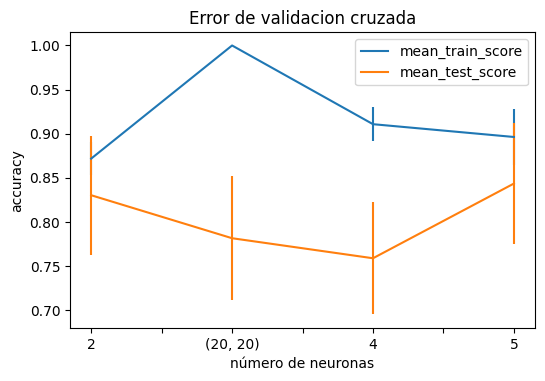

In [180]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('número de neuronas')
ax.set_title('Error de validacion cruzada')

In [181]:
grid.best_params_

{'hidden_layer_sizes': 5}

In [182]:
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.062604,0.026127,0.003663,0.007327,2,{'hidden_layer_sizes': 2},0.888889,0.844444,0.911111,0.733333,...,0.830101,0.067646,2,0.860335,0.871508,0.843575,0.893855,0.888889,0.871633,0.018474
1,0.065269,0.009410,0.001401,0.002801,"(20, 20)","{'hidden_layer_sizes': (20, 20)}",0.800000,0.644444,0.844444,0.822222,...,0.781313,0.070628,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.205687,0.078621,0.003753,0.003074,4,{'hidden_layer_sizes': 4},0.844444,0.777778,0.800000,0.688889,...,0.758586,0.063571,4,0.877095,0.916201,0.905028,0.932961,0.922222,0.910701,0.019079
3,0.187210,0.094584,0.002530,0.001826,5,{'hidden_layer_sizes': 5},0.933333,0.800000,0.911111,0.822222,...,0.843333,0.068889,1,0.905028,0.882682,0.843575,0.938547,0.911111,0.896189,0.031767


In [183]:
# Calcular accuracy en el conjunto de test
accuracy_test = grid.score(X_test, y_test)
print(f"Accuracy en conjunto de test: {accuracy_test:.4f}")

# Calcular accuracy en el conjunto de entrenamiento
accuracy_train = grid.score(X_train, y_train)
print(f"Accuracy en conjunto de entrenamiento: {accuracy_train:.4f}")


Accuracy en conjunto de test: 0.6667
Accuracy en conjunto de entrenamiento: 0.9375


In [184]:
scores.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_hidden_layer_sizes', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [185]:
scores['params']

0           {'hidden_layer_sizes': 2}
1    {'hidden_layer_sizes': (20, 20)}
2           {'hidden_layer_sizes': 4}
3           {'hidden_layer_sizes': 5}
Name: params, dtype: object